#Image Classification using CNN Architectures | Assignment DL

#Question 1: What is a Convolutional Neural Network (CNN), and how does it differ from traditional fully connected neural networks in terms of architecture and performance on image data?


- ANS = A Convolutional Neural Network (CNN) is a type of deep learning model designed specifically for image and spatial data.
It automatically learns local patterns (edges, textures, shapes) from images using convolution filters instead of connecting every neuron to every input.


- Architecture difference
   - Fully Connected Neural Network (FCNN)

      - Every neuron is connected to every input pixel

      - Image must be flattened into a long vector
   - Convolutional Neural Network (CNN)

        - Uses convolution layers with small filters (e.g., 3*3, 5*5)

        - Neurons connect only to local regions      

- Parameter efficiency

    - FCNN: Millions of parameters → overfitting, slow training

    - CNN: Far fewer parameters due to weight sharing → faster, more stable        
- Feature learning

    - FCNN: Needs manual feature extraction

    - CNN: Learns features automatically:    

#Question 2: Discuss the architecture of LeNet-5 and explain how it laid the foundation for modern deep learning models in computer vision. Include references to its original research paper.
    
- ANS =  Architecture of LeNet-5 - LeNet-5 is one of the earliest Convolutional Neural Networks, proposed by Yann LeCun et al. for handwritten digit recognition (MNIST-like tasks).   

- Layer structure:

    - Input: 32×32 grayscale image

    - C1: Convolution (6 feature maps, 5×5)

    - S2: Average pooling

    - C3: Convolution (16 feature maps, 5×5)

    - S4: Average pooling

    - C5: Convolution (120 feature maps)

    - F6: Fully connected layer (84 neurons)

    - Output: 10 neurons (digits 0–9)

- Why LeNet-5 was important

   - Introduced the CNN pattern: Conv → Pool → FC

   - Used local connectivity and weight sharing, reducing parameters

   - Preserved spatial information in images

   - Enabled automatic feature learning instead of manual features

   - This architecture became the foundation for modern CNNs like AlexNet and VGG.

- Reference (Original Paper)

   - LeCun, Y., Bottou, L., Bengio, Y., & Haffner, P. (1998).
   - Gradient-Based Learning Applied to Document Recognition,
   - Proceedings of the IEEE, 86(11), 2278–2324.
#Question 3: Compare and contrast AlexNet and VGGNet in terms of design principles, number of parameters, and performance. Highlight key innovations and limitations of each.

- ANS =Comparison of AlexNet and VGGNet
1.  Design principles

  - AlexNet (2012)

      - Proposed by Krizhevsky et al.

      - Uses large convolution filters (11×11, 5×5)
  - VGGNet (2014)

      - Proposed by Simonyan and Zisserman

     - Uses small 3×3 filters only
2. Number of Parameters
3. Performance
    - AlexNet:

       - First major breakthrough on ImageNet (2012)

       - Much better than traditional methods at the time

   - VGGNet:

       - Higher accuracy than AlexNet on ImageNet

       - Better feature representation due to increased depth

4. Key innovations
   - ReLU activation
   - VGGNet

5. Limitations
    - AlexNet

       - Large filters → computationally inefficient

       - Shallow depth limits feature learning

  - VGGNet

      - Extremely large model size

      - High memory and computation cost      

#Question 4: What is transfer learning in the context of image classification? Explain how it helps in reducing computational costs and improving model performance with limited data.      

- ANS = Transfer Learning in Image Classification - Transfer learning is a technique where a model pre-trained on a large dataset (e.g., ImageNet) is reused for a new image classification task by fine-tuning it on a smaller target dataset.

- How transfer learning works

    - Use a pre-trained CNN (ResNet, VGG, MobileNet)

    - Keep early layers frozen (they learn generic features like edges)

    - Fine-tune later layers for the new task

- Why it reduces computational cost

    - No need to train the model from scratch

    - Fewer parameters are updated

    - Requires less training time and hardware

- Why it improves performance with limited data

    - Pre-trained models already learned rich visual features

    - Reduces overfitting on small datasets

    - Achieves higher accuracy with fewer labeled images

#Question 5: Describe the role of residual connections in ResNet architecture. How do they address the vanishing gradient problem in deep CNNs?

- ANS = Role of Residual Connections in ResNet - Residual connections (skip connections) allow the input of a layer to be added directly to its output, forming a residual block:
    y = F(x)+x

- Why residual connections are important

    - They enable very deep networks (50, 101, 152 layers)

     - Make learning easier by letting layers learn residual mappings instead of full transformations   

- How they solve the vanishing gradient problem

    - Gradients can flow directly through skip connections

    - Even if F(x) has very small gradients, the identity path preserves them     
    

#Question 6: Implement the LeNet-5 architectures using Tensorflow or PyTorch to classify the MNIST dataset. Report the accuracy and training time.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import time

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = tf.pad(x_train, [[0,0],[2,2],[2,2]])
x_test = tf.pad(x_test, [[0,0],[2,2],[2,2]])

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

model = models.Sequential([
    layers.Conv2D(6, kernel_size=5, activation='tanh', input_shape=(32,32,1)),
    layers.AveragePooling2D(pool_size=(2, 2)),

    layers.Conv2D(16, kernel_size=5, activation='tanh'),
    layers.AveragePooling2D(pool_size=(2, 2)),

    layers.Conv2D(120, kernel_size=5, activation='tanh'),

    layers.Flatten(),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

start_time = time.time()
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
training_time = time.time() - start_time

test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Accuracy:", test_accuracy)
print("Training Time (seconds):", training_time)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 31s 69ms/step - accuracy: 0.8242 - loss: 0.6265 - val_accuracy: 0.9632 - val_loss: 0.1382
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 69ms/step - accuracy: 0.9546 - loss: 0.1476 - val_accuracy: 0.9740 - val_loss: 0.0864
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 31s 72ms/step - accuracy: 0.9736 - loss: 0.0886 - val_accuracy: 0.9793 - val_loss: 0.0707
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 70ms/step - accuracy: 0.9810 - loss: 0.0648 - val_accuracy: 0.9840 - val_loss: 0.0537
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 31s 72ms/step - accuracy: 0.9854 - loss: 0.0490 - val_accuracy: 0.9862 - val_loss: 0.0507
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9820 - loss: 0.0530
Test Accuracy: 0.984499990940094
Training Time (seconds): 161.26981258392334


#QUESTION 7 - Use a pre-trained VGG16 model (via transfer learning) on a small custom dataset (e.g., flowers or animals). Replace the top layers and fine-tune the model. Include your code and result discussion.



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import time
(train_ds, val_ds), ds_info = tfds.load(
    "tf_flowers",
    split=["train[:80%]", "train[80%:]"],
    as_supervised=True,
    with_info=True
)
IMG_SIZE = 224
BATCH_SIZE = 32
NUM_CLASSES = ds_info.features["label"].num_classes

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

train_ds = train_ds.map(preprocess).shuffle(1000).batch(BATCH_SIZE)
val_ds = val_ds.map(preprocess).batch(BATCH_SIZE)
base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation="softmax")
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
start_time = time.time()

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

feature_extraction_time = time.time() - start_time
for layer in base_model.layers[-4:]:
    layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

fine_tune_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)
loss, accuracy = model.evaluate(val_ds)

print("Final Validation Accuracy:", accuracy)
print("Feature Extraction Training Time (seconds):", feature_extraction_time)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.IE2AF7_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 2219s 24s/step - accuracy: 0.4656 - loss: 1.9878 - val_accuracy: 0.7875 - val_loss: 0.6902
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 2221s 24s/step - accuracy: 0.7133 - loss: 0.7798 - val_accuracy: 0.7956 - val_loss: 0.5568
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 2194s 24s/step - accuracy: 0.7851 - loss: 0.5985 - val_accuracy: 0.8215 - val_loss: 0.4916
Epoch 4/5
27/92 ━━━━━━━━━━━━━━━━━━━━ 20:43 19s/step - accuracy: 0.8012 - loss: 0.5316

#Question 8: Write a program to visualize the filters and feature maps of the first convolutional layer of AlexNet on an example input image.



In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
alexnet = models.alexnet(pretrained=True)
alexnet.eval()


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 137MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

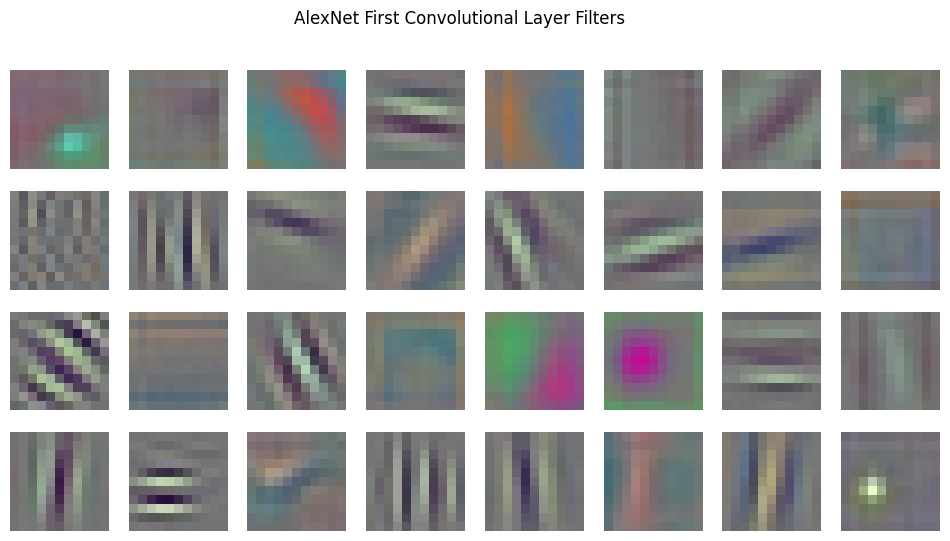

In [ ]:
first_conv_layer = alexnet.features[0]
weights = first_conv_layer.weight.data.clone()
weights = weights - weights.min()
weights = weights / weights.max()

fig, axs = plt.subplots(4, 8, figsize=(12,6))

for i, ax in enumerate(axs.flat):
    ax.imshow(weights[i].permute(1, 2, 0))
    ax.axis('off')

plt.suptitle("AlexNet First Convolutional Layer Filters")
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:

img = Image.open("cat.jpg").convert("RGB")

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

input_img = transform(img).unsqueeze(0)


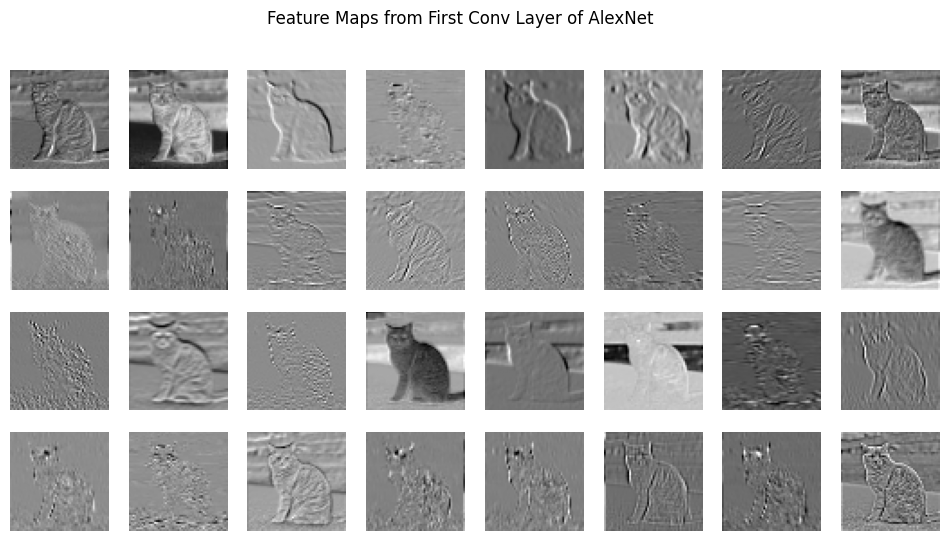

In [ ]:
with torch.no_grad():
    feature_maps = first_conv_layer(input_img)
fig, axs = plt.subplots(4, 8, figsize=(12,6))

for i, ax in enumerate(axs.flat):
    ax.imshow(feature_maps[0, i].cpu(), cmap='gray')
    ax.axis('off')

plt.suptitle("Feature Maps from First Conv Layer of AlexNet")
plt.show()


#Question 8: Write a program to visualize the filters and feature maps of the first convolutional layer of AlexNet on an example input image.



In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


In [ ]:
model = models.alexnet(weights=models.AlexNet_Weights.DEFAULT)
model.eval()


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
first_conv = model.features[0]


In [ ]:
!wget -O cat.jpg https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg


--2026-01-05 07:45:55--  https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279603 (273K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>] 273.05K  1.68MB/s    in 0.2s    

2026-01-05 07:45:56 (1.68 MB/s) - ‘cat.jpg’ saved [279603/279603]



In [ ]:
img = Image.open("cat.jpg").convert("RGB")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

input_img = transform(img).unsqueeze(0)


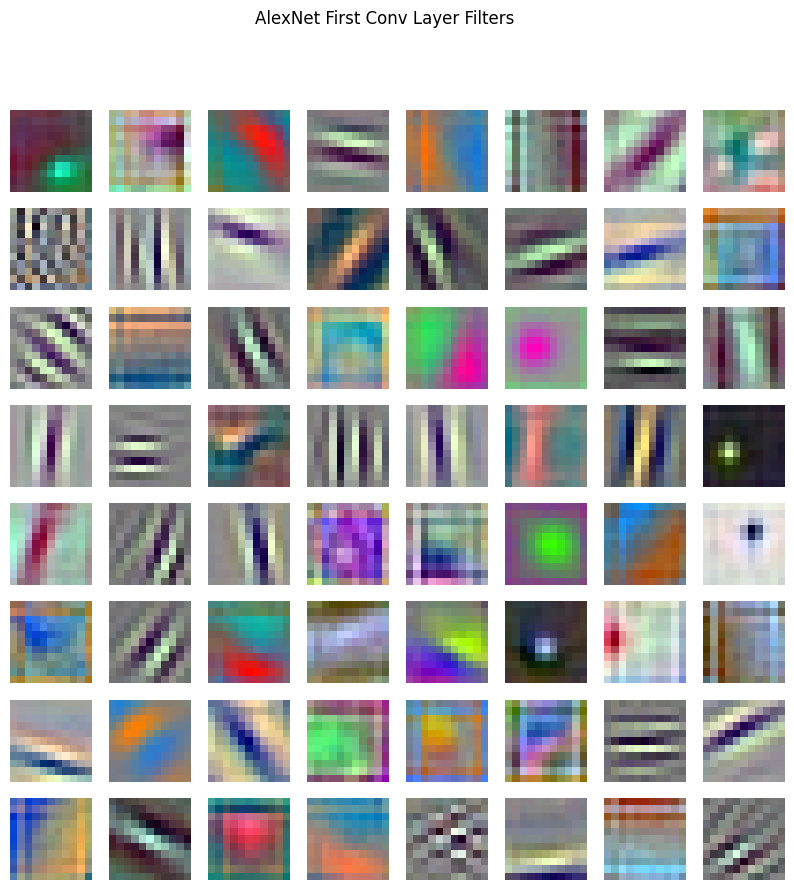

In [ ]:
filters = first_conv.weight.data.clone()

fig, axes = plt.subplots(8, 8, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    if i < 64:
        filt = filters[i]
        filt = (filt - filt.min()) / (filt.max() - filt.min())
        ax.imshow(filt.permute(1,2,0))
        ax.axis("off")

plt.suptitle("AlexNet First Conv Layer Filters")
plt.show()


In [ ]:
with torch.no_grad():
    feature_maps = first_conv(input_img)


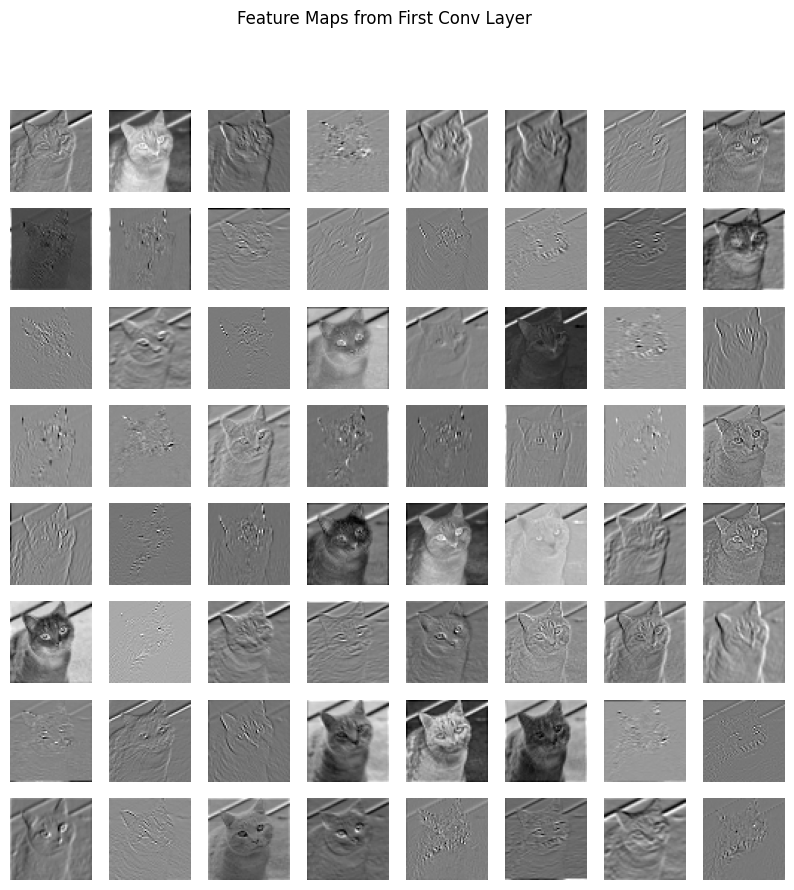

In [ ]:
fig, axes = plt.subplots(8, 8, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    if i < 64:
        fmap = feature_maps[0, i]
        ax.imshow(fmap, cmap="gray")
        ax.axis("off")

plt.suptitle("Feature Maps from First Conv Layer")
plt.show()


#Question 9: Train a GoogLeNet (Inception v1) or its variant using a standard dataset like CIFAR-10. Plot the training and validation accuracy over epochs and analyze overfitting or underfitting.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
transform_train = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

transform_test = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)

testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_test)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)


100%|██████████| 170M/170M [00:10<00:00, 15.9MB/s]


In [ ]:
model = torchvision.models.googlenet(weights=None, aux_logits=False)
model.fc = nn.Linear(model.fc.in_features, 10)
model = model.to(device)


/usr/local/lib/python3.12/dist-packages/torchvision/models/googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0003)


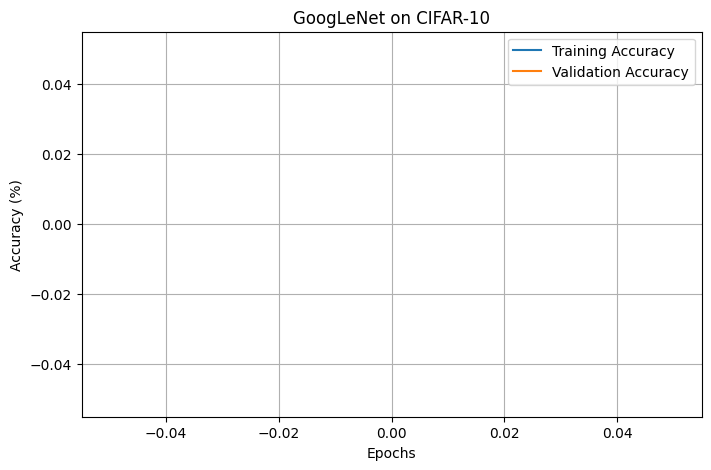

In [25]:
plt.figure(figsize=(8,5))
plt.plot(train_acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("GoogLeNet on CIFAR-10")
plt.legend()
plt.grid(True)
plt.show()


#Question 10: You are working in a healthcare AI startup. Your team is tasked with developing a system that automatically classifies medical X-ray images into normal, pneumonia, and COVID-19. Due to limited labeled data, what approach would you suggest using among CNN architectures discussed (e.g., transfer learning with ResNet or Inception variants)? Justify your approach and outline a deployment strategy for production use.


- Due to limited labeled medical X-ray data, the best approach is transfer learning using a pre-trained CNN such as ResNet-50.

- Why:

    - Medical datasets are small → training from scratch causes overfitting

    - Pre-trained models already learn useful visual features

    - ResNet’s residual connections improve stability and accuracy

    - Faster training and lower computational cost

- Approach:

   - Load ImageNet-pretrained ResNet-50

    - Replace final layer with 3 classes (Normal, Pneumonia, COVID-19)

    - Freeze early layers, fine-tune top layers

    - Use data augmentation and class-weighted loss

- Deployment:

   - Optimize model (ONNX / TorchScript)

   - Deploy via REST API on cloud

   - Use Grad-CAM for explainability

   - Keep human-in-the-loop for medical safety

- Conclusion:
     - Transfer learning with ResNet provides high accuracy, low data requirement, and safe production deployment for healthcare AI systems.